# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

# Region and Domain
United States

Movies and Streaming Services

# Research Question
Which streaming service offers the most movie options per audience (Kids, Teens, and Adults)?

# Data Cleaning
* filter for movies only
* exclude records that don't have an age rating
* clear out junk in rating
* Age Rating Groups: Kids, Teen, Adult

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
# dictionary to categorize movie ratings
movie_ratings = {'G': 'Kids',
                 'PG': 'Kids',
                 'Y': 'Kids',
                 'Y7': 'Kids',
                 '13': 'Teen',
                 '14': 'Teen',
                 '17': 'Adult',
                 'R': 'Adult',
                 'MA': 'Adult'}

In [3]:
# Netflix
netflix = pd.read_csv('netflix_titles.csv')

## filter just for movies
netflix_movies = netflix[netflix['type'] == "MOVIE"]

## exclude NaN values or 'Unrated' in rating
netflix_movies = netflix_movies[netflix_movies['age_certification'].notnull()]
netflix_movies = netflix_movies[~netflix_movies['age_certification'].str.contains('(?i)nr|not rated', regex=True, na=False)]

## clean up age_certification before mapping
netflix_movies['age_certification'] = netflix_movies['age_certification'].apply(lambda x: re.sub('[A-Z]{2}-', '', x.upper()))
netflix_movies = netflix_movies[~netflix_movies['age_certification'].str.contains('(?i)min|season', regex=True, na=False)]

## standardize age rating
netflix_movies['age_category'] = netflix_movies['age_certification'].map(movie_ratings)

In [4]:
netflix_movies[~netflix_movies['age_certification'].str.contains('(?i)min|season', regex=True, na=False)]['age_certification'].value_counts()

R     556
13    451
PG    233
G     124
17     16
Name: age_certification, dtype: int64

In [5]:
netflix_movies[netflix_movies['age_category'].isnull()] # should be blank dataframe

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,age_category


In [6]:
netflix_counts = netflix_movies['age_category'].value_counts()

# convert to a dataframe to transpose so can be added to others
netflix_counts = pd.DataFrame(netflix_counts).transpose()
netflix_counts.rename({'age_category': 'Netflix'}, inplace=True)

netflix_counts

,Adult,Teen,Kids
Netflix,572,451,357


In [7]:
# Hulu
hulu = pd.read_csv('hulu_titles.csv')

## filter just for movies
hulu_movies = hulu[hulu['type'] == 'Movie']

## exclude NaN values or 'Unrated' in rating
hulu_movies = hulu_movies[hulu_movies['rating'].notnull()]
hulu_movies = hulu_movies[~hulu_movies['rating'].str.contains('(?i)nr|not rated', regex=True, na=False)]

## strip the rating of 'TV-' or 'PG-' or 'NC-' before mapping it to standard age category
hulu_movies['rating'] = hulu_movies['rating'].apply(lambda x: re.sub('[A-Z]{2}-', '', x.upper()))
hulu_movies = hulu_movies[~hulu_movies['rating'].str.contains('(?i)min|season', regex=True, na=False)]

## standardize age rating
hulu_movies['age_category'] = hulu_movies['rating'].map(movie_ratings)

hulu_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_category
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...,Adult
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...,Teen
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...,Adult
11,s12,Movie,Dream Horse,NaN,NaN,NaN,"October 18, 2021",2020,PG,113 min,"Comedy, Drama",The film tells the inspiring true story of a s...,Kids
20,s21,Movie,Cheer Camp Killer,NaN,NaN,NaN,"October 15, 2021",2020,14,87 min,Thriller,Camp queen bee Victoria does not take kindly t...,Teen


In [8]:
hulu_movies[~hulu_movies['rating'].str.contains('(?i)min|season', regex=True, na=False)]['rating'].value_counts()

R     345
13    163
PG    154
MA     92
14     82
G      54
Y       6
Y7      4
Name: rating, dtype: int64

In [9]:
hulu_movies[hulu_movies['age_category'].isnull()] # should be blank dataframe

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_category


In [10]:
hulu_counts = hulu_movies['age_category'].value_counts()

# convert to a dataframe to transpose so can be added to others
hulu_counts = pd.DataFrame(hulu_counts).transpose()
hulu_counts.rename({'age_category': 'Hulu'}, inplace=True)

In [11]:
# HBO Max
hbo = pd.read_csv('hbo_titles.csv')

## filter just for movies
hbo_movies = hbo[hbo['type'] == 'MOVIE']

## exclude NaN values or 'Unrated' movies
hbo_movies = hbo_movies[hbo_movies['age_certification'].notnull()]
hbo_movies = hbo_movies[~hbo_movies['age_certification'].str.contains('(?i)nr|not rated', regex=True, na=False)]

## strip the rating of 'TV-' or 'PG-' or 'NC-' before mapping it to standard age category
hbo_movies['age_certification'] = hbo_movies['age_certification'].apply(lambda x: re.sub('[A-Z]{2}-', '', x.upper()))
hbo_movies = hbo_movies[~hbo_movies['age_certification'].str.contains('(?i)min|season', regex=True, na=False)]

## standardize age category
hbo_movies['age_category'] = hbo_movies['age_certification'].map(movie_ratings)

hbo_movies.head()
#len(hbo_movies)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,age_category
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6,Kids
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0,Kids
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2,Kids
5,tm156463,Gone with the Wind,MOVIE,The spoiled daughter of a well-to-do plantatio...,1939,G,233,"['war', 'romance', 'drama', 'history']",['US'],NaN,tt0031381,8.2,309856.0,24.092,8.0,Kids
13,tm47834,M,MOVIE,"In this classic German thriller, Hans Beckert,...",1931,13,117,"['thriller', 'european', 'crime']",['DE'],NaN,tt0022100,8.3,155068.0,9.165,8.1,Teen


In [12]:
hbo_movies['age_certification'].value_counts()

R     597
13    470
PG    308
G      83
17      7
Name: age_certification, dtype: int64

In [13]:
hbo_movies[hbo_movies['age_category'].isnull()] # should be blank dataframe

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,age_category


In [14]:
hbo_counts = hbo_movies['age_category'].value_counts()

# convert to a dataframe to transpose so can be added to others
hbo_counts = pd.DataFrame(hbo_counts).transpose()
hbo_counts.rename({'age_category': 'HBO Max'}, inplace=True)

In [15]:
# Amazon Prime
amazon = pd.read_csv('amazon_titles.csv')

## filter just for movies
amazon_movies = amazon[amazon['type'] == 'MOVIE']

## exclude NaN values and 'Unrated' movies
amazon_movies = amazon_movies[amazon_movies['age_certification'].notnull()]
amazon_movies = amazon_movies[~amazon_movies['age_certification'].str.contains('(?i)nr|not rated', regex=True, na=False)]

## clean up rating column
amazon_movies['age_certification'] = amazon_movies['age_certification'].apply(lambda x: re.sub('[A-Z]{2}-', '', x.upper()))
amazon_movies = amazon_movies[~amazon_movies['age_certification'].str.contains('(?i)min|season', regex=True, na=False)]

## standardize age category
amazon_movies['age_category'] = amazon_movies['age_certification'].map(movie_ratings)

amazon_movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,age_category
6,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,444243.0,26.495,8.3,Kids
13,tm112415,Tell Your Children,MOVIE,High-school principal Dr. Alfred Carroll relat...,1938,PG,66,"['drama', 'crime']",['US'],NaN,tt0028346,3.7,8617.0,5.412,4.1,Kids
34,tm159975,The Little Princess,MOVIE,The classic Shirley Temple film in which a lit...,1939,G,93,"['comedy', 'drama', 'family']",['US'],NaN,tt0031580,7.1,6122.0,6.148,6.8,Kids
51,tm52,A Farewell to Arms,MOVIE,"A tale of the World War I love affair, begun i...",1932,PG,89,"['drama', 'romance', 'war']",['US'],NaN,tt0022879,6.4,5970.0,7.581,6.3,Kids
52,tm97774,The Scarlet Letter,MOVIE,"In the seventeenth century, in Massachusetts, ...",1934,G,69,"['drama', 'history', 'romance']",['US'],NaN,tt0025747,5.3,367.0,1.666,4.0,Kids


In [16]:
amazon_movies['age_certification'].value_counts()

R     1249
13     588
PG     582
G      269
17      13
Name: age_certification, dtype: int64

In [17]:
amazon_movies[amazon_movies['age_category'].isnull()] # should be blank dataframe

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,age_category


In [18]:
amazon_counts = amazon_movies['age_category'].value_counts()

# convert to a dataframe to transpose so can be added to others
amazon_counts = pd.DataFrame(amazon_counts).transpose()
amazon_counts.rename({'age_category': 'Amazon Prime'}, inplace=True)

# Image
* Grouped bar charts of counts by age rating
* Heat map of IMDb ratings and genres by streaming service

In [73]:
df = pd.concat([netflix_counts, hulu_counts, hbo_counts, amazon_counts])
df = df.transpose()

Text(0.5, 1.0, 'Movies by Streaming Service')

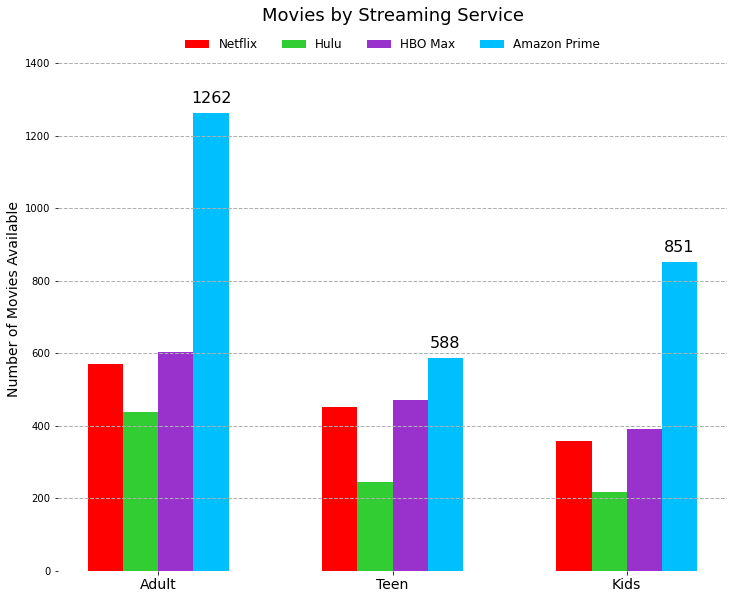

In [83]:
# max counts per age_category
max_vals = df.max(axis=1)
max_vals_ind = [df.columns.get_loc(ind) for ind in df.idxmax(axis=1).values]

ages = df.index

x = np.arange(len(ages))
width = 0.15
multiplier = 0

coloring = {"Netflix":"red", "Amazon Prime": "deepskyblue", "HBO Max": "darkorchid", "Hulu":"limegreen"}

fig, ax = plt.subplots(figsize=(12,10))

# gridlines
ax.grid(visible=True, which='major', axis='y', linestyle="--", linewidth=1)

# plot the bars themselves
for service, service_count in df.items():
    offset = width * multiplier
    bars = ax.bar(x+offset, service_count, width, label=service, color=coloring[service])
    #ax.bar_label(bars, padding=3, fontsize=12)
    multiplier += 1
    
    
# label the max value in each group
for i in range(df.shape[0]): 
    # make sure data labels is above the max bar
    x_coord = i + (width * max_vals_ind[i])
    
    plt.annotate(max_vals[i], xy=(x_coord,max_vals[i]), xytext=(0,10), 
                 textcoords="offset points", ha="center", fontsize=16)

    
# remove graph frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

    
# add text and legend
ax.legend(loc='upper center', ncol=4, fontsize=12, frameon=False)
ax.set_xticks(x + (width*len(ages)/2), ages, fontsize=14)
ax.set_ylabel('Number of Movies Available', fontsize=14)
ax.set_ylim(0,1500)
ax.set_title('Movies by Streaming Service', fontsize=18)

